# Problem Statement: 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal:
(1) Understanding which variables are significant in predicting the price of a house, and
(2) How well those variables describe the price of a house.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Igore Warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

## Reading and Understanding Data

In [117]:
houses = pd.read_csv("train.csv")

In [119]:
houses.shape

(1460, 81)

In [120]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [124]:
houses.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Data Cleaning

In [128]:
houses.duplicated().sum()

0

In [129]:
houses.isnull().all(axis=0).sum()

0

In [131]:
#Percentage of NUll Values
pd.set_option('display.max_rows', None)
100*houses.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [133]:
#Removing the columns with high % of null values
houses.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [136]:
houses.shape

(1460, 75)

In [137]:
## As per Data Dictionary NA value represent value is not present, replacing it with 'none'
column_with_na = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for column in column_with_na:
    houses[column].fillna("none", inplace=True)

In [140]:
#Replacing null values for LotFrontage, GarageYrBlt and MasVnrArea with median
houses["GarageYrBlt"].fillna(houses["GarageYrBlt"].median(), inplace=True)
houses["LotFrontage"].fillna(houses["LotFrontage"].median(), inplace=True)
houses["MasVnrArea"].fillna(houses["MasVnrArea"].median(), inplace=True)

In [142]:
#Replacing null values for Electrical with mode
houses['Electrical'] = houses['Electrical'].fillna(houses['Electrical'].mode()[0])

In [144]:
#Check Percentage of NUll Values again
100*houses.isnull().mean().sort_values(ascending=False)

Id               0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSSubClass       0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig    

In [146]:
#Id Column doesn't help in model evaluation, removing it
houses=houses.drop('Id',axis='columns')

In [148]:
houses = houses.round(decimals = 2)

In [150]:
## Derived Columns
#Total Area
houses['Total_Area_sqft'] = (houses['BsmtFinSF1'] + houses['BsmtFinSF2'] + houses['1stFlrSF'] + houses['2ndFlrSF'])
# No of Bathrooms
houses['No_Of_Bathrooms'] = (houses['FullBath'] + (0.5 * houses['HalfBath']) + houses['BsmtFullBath'] + (0.5 * houses['BsmtHalfBath']))
#Porch Area
houses['Porch_Area_sqft'] = (houses['OpenPorchSF'] + houses['3SsnPorch'] + houses['EnclosedPorch'] + houses['ScreenPorch'] + houses['WoodDeckSF'])
#Age of Property
houses['Total_Age'] = houses['YrSold'] - houses['YearBuilt']
houses['Garage_Age'] = houses['YrSold'] - houses['GarageYrBlt']
houses['Remodel_Age'] = houses['YrSold'] - houses['YearRemodAdd']


In [152]:
#Removing columns referenced in derived columns
remove_columns = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF','GarageYrBlt','YearRemodAdd']
houses.drop(remove_columns,axis=1,inplace=True)

In [154]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   LotShape         1460 non-null   object 
 6   LandContour      1460 non-null   object 
 7   Utilities        1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  Condition2       1460 non-null   object 
 13  BldgType         1460 non-null   object 
 14  HouseStyle       1460 non-null   object 
 15  OverallQual      1460 non-null   int64  
 16  OverallCond      1460 non-null   int64  
 17  YearBuilt     

In [156]:
houses.shape

(1460, 65)

In [157]:
# Removing Columns where 90% unique values

columns_90per_unique = [] 
for column in houses.columns :
    if houses[column].value_counts().max() >= (1460*0.90):
        columns_90per_unique.append(column)
print(columns_90per_unique)
houses.drop(columns_90per_unique,axis=1,inplace=True)
houses.shape

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


(1460, 50)

## Univariate Analysis

In [167]:
#Separating Categorical and Numerical columns for Analysis
Categorical_Columns_List = []
Numerical_Columns_List = []
for column in houses.columns :
    if houses[column].dtype == "object":
        Categorical_Columns_List.append(column)
    else:
        Numerical_Columns_List.append(column)
        
print(Categorical_Columns_List)
print(Numerical_Columns_List)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_Area_sqft', 'No_Of_Bathrooms', 'Porch_Area_sqft', 'Total_Age', 'Garage_Age', 'Remodel_Age']


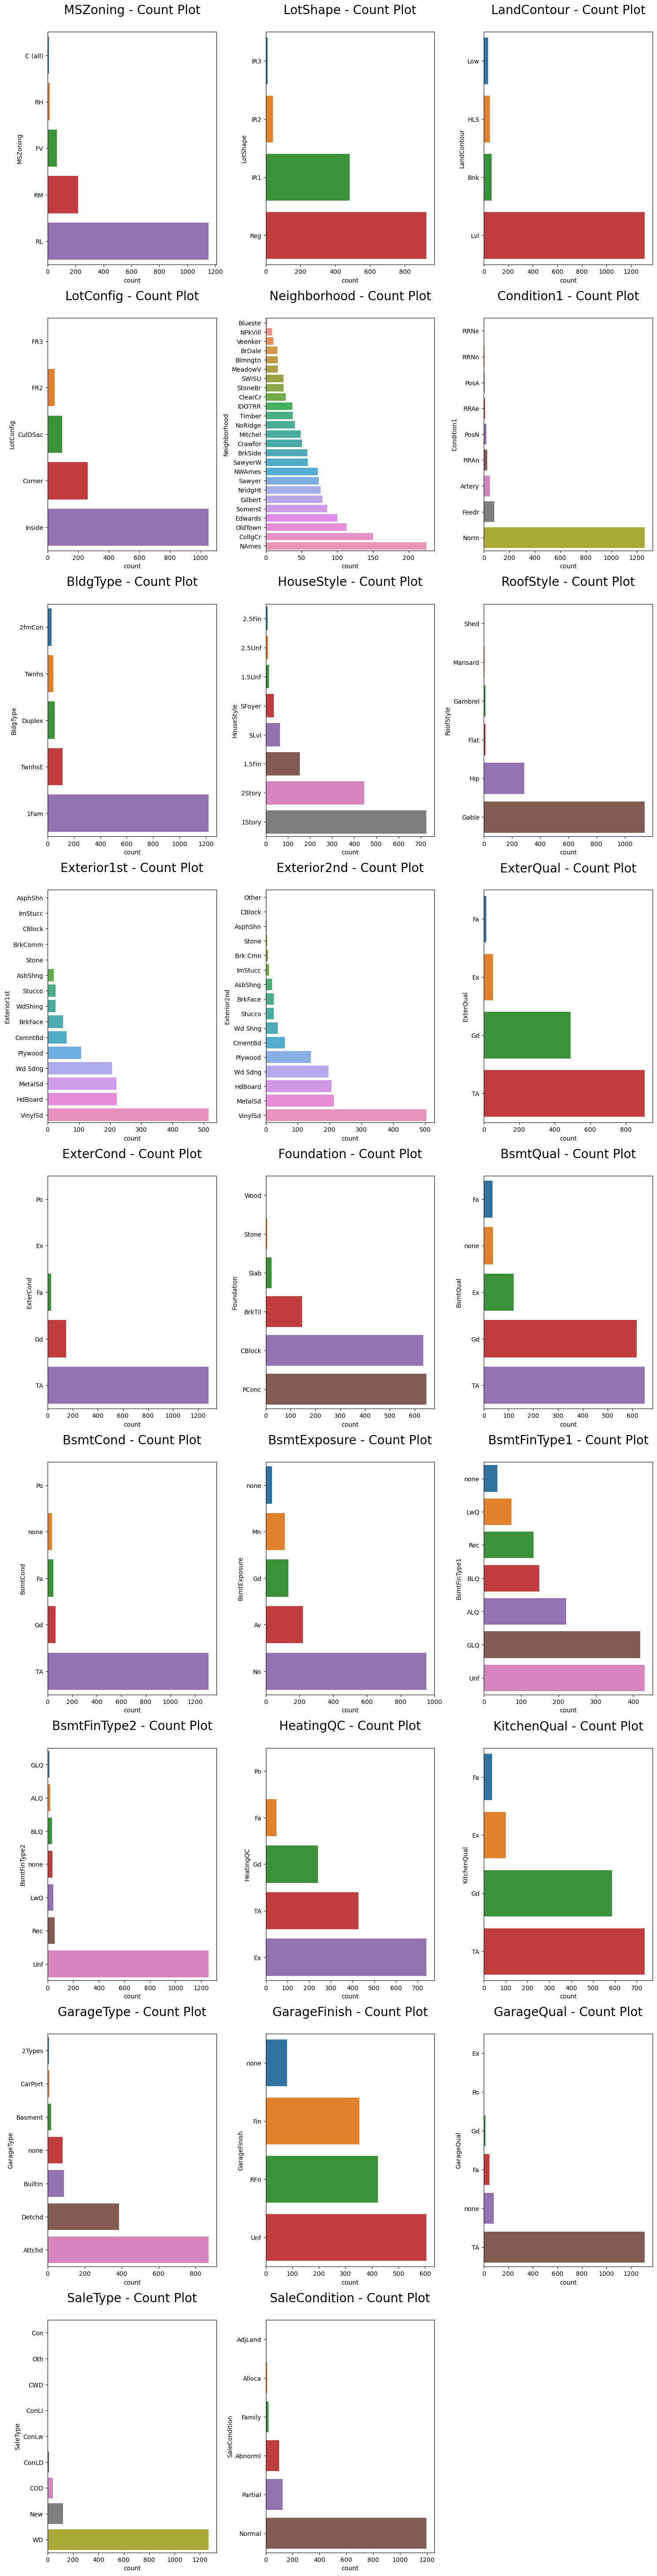

In [176]:
#Count Plot for Categorical Columns
plt.figure(figsize = (15,110))
columnCount = 0
for column in Categorical_Columns_List:
    columnCount = columnCount+1
    plt.subplot(17,3,columnCount)
    sns.countplot(y = houses[str(column)], order = houses[str(column)].value_counts().sort_values().index)
    plt.title(str(column) + " - Count Plot\n", fontsize=20)
plt.tight_layout()
plt.show()

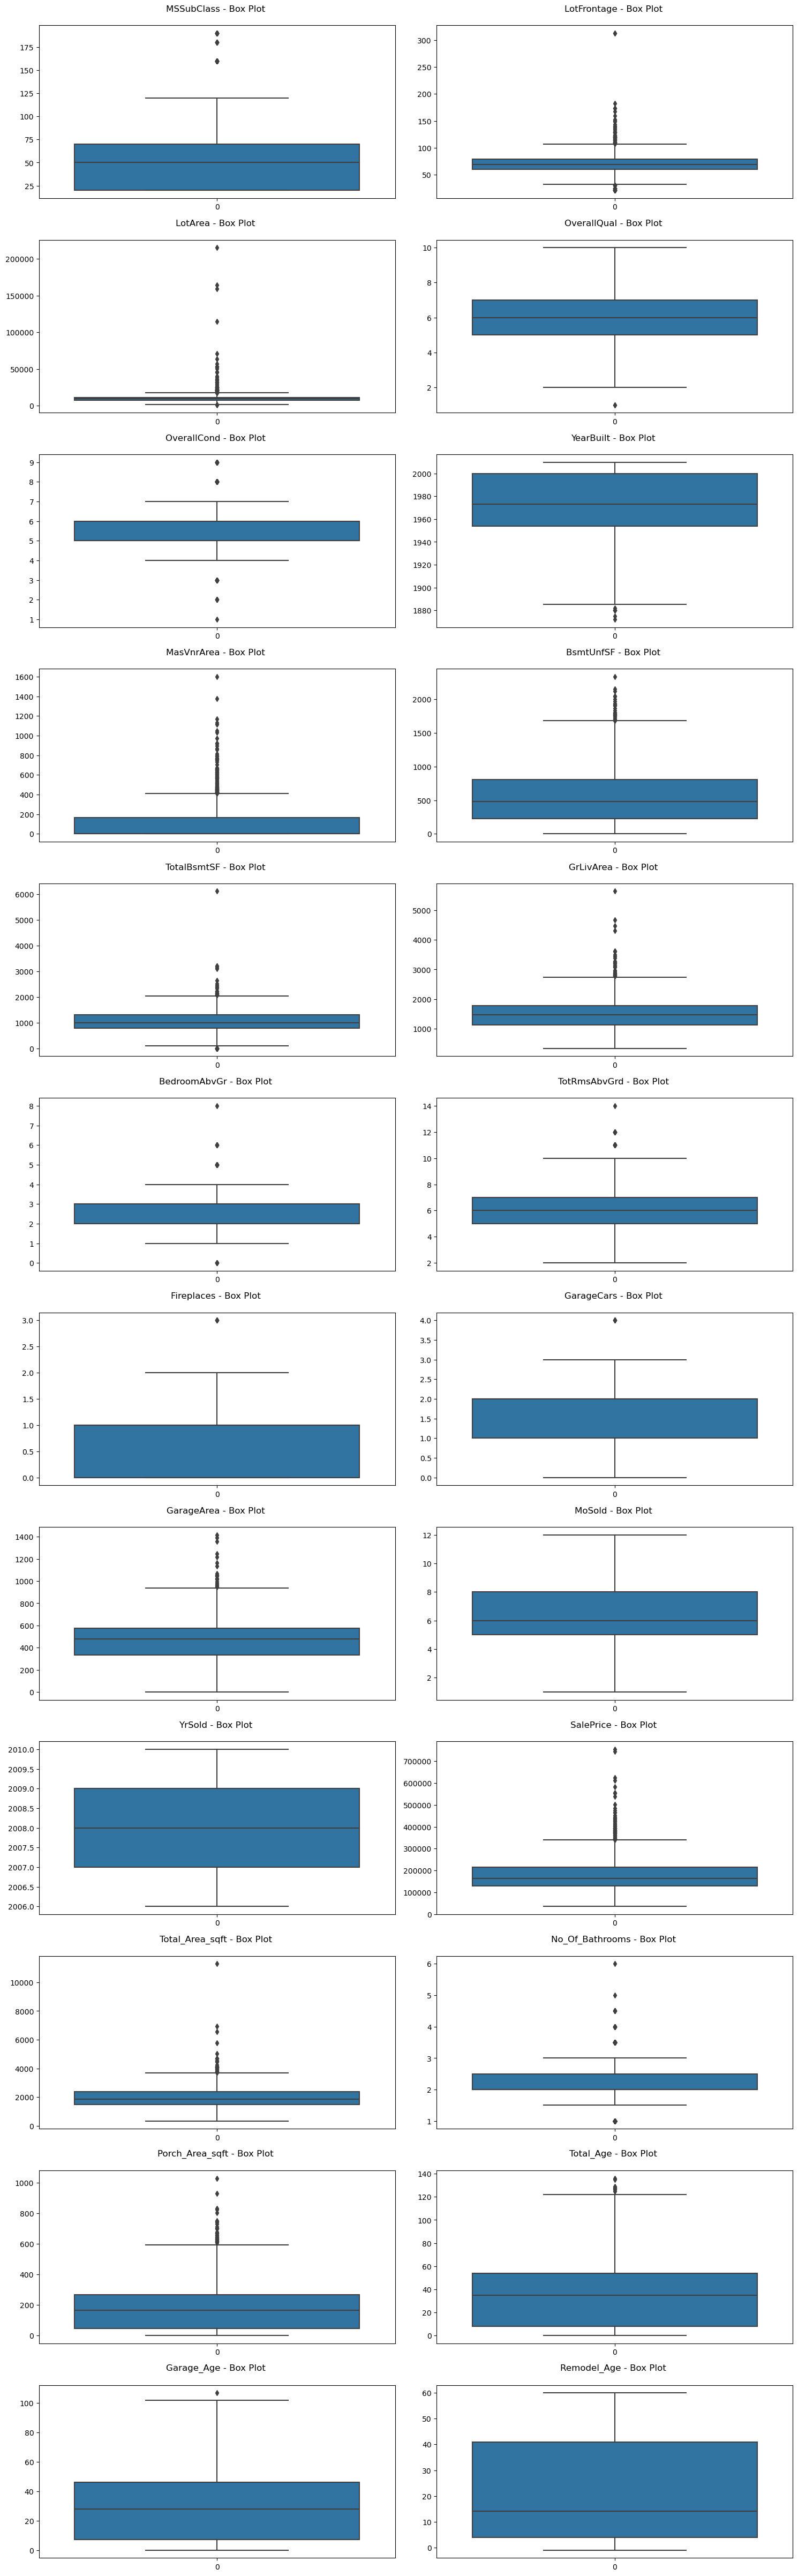

In [178]:
#Boxplot for Numerical Columns to analyze outliers
plt.figure(figsize = (15,100))
columnCount = 0
for column in Numerical_Columns_List:
    columnCount = columnCount + 1
    plt.subplot(25,2,columnCount)
    plt.title(str(column) + " - Box Plot \n")
    sns.boxplot(houses[str(column)])
plt.tight_layout()
plt.show()

In [182]:
#There are Outliers so let's remove data above 98 percentile so that data is useful for analysis
Column_outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_Area_sqft','Porch_Area_sqft']
for column in Column_outlier:
    remove_quantile = houses[column].quantile(0.98)
    houses = houses[houses[column] < remove_quantile]

In [184]:
houses.shape

(1290, 50)

## Bivariate Analysis

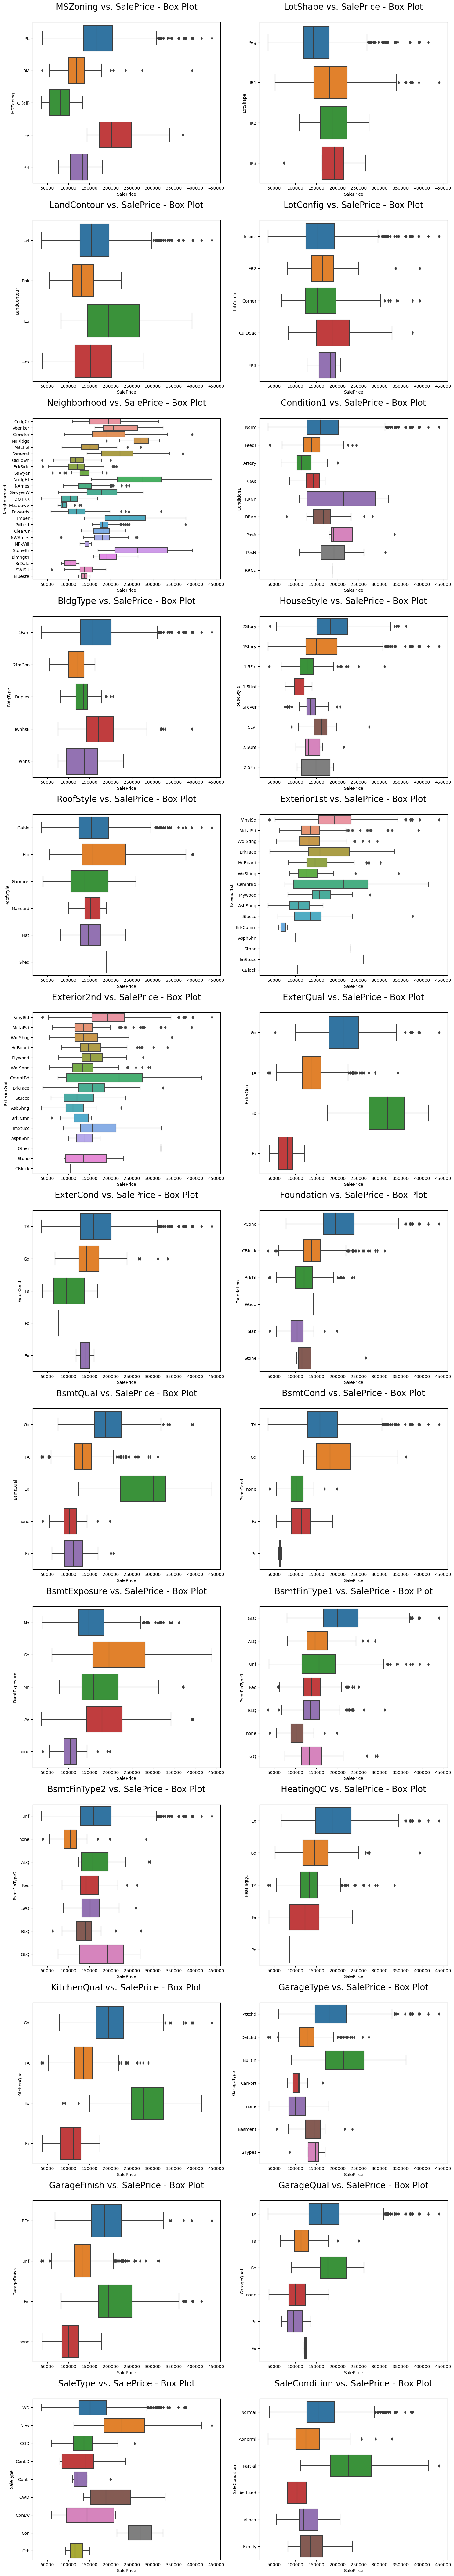

In [187]:
#Plotting SalePrice vs categorical columns
plt.figure(figsize = (15,110))
columnCount = 0
for column in Categorical_Columns_List:
    columnCount = columnCount + 1
    plt.subplot(17,2,columnCount)
    sns.boxplot(x = 'SalePrice', y = houses[str(column)], data = houses)
    plt.title(str(column) + " vs. SalePrice - Box Plot\n",fontsize = 20)  
plt.tight_layout()
plt.show()

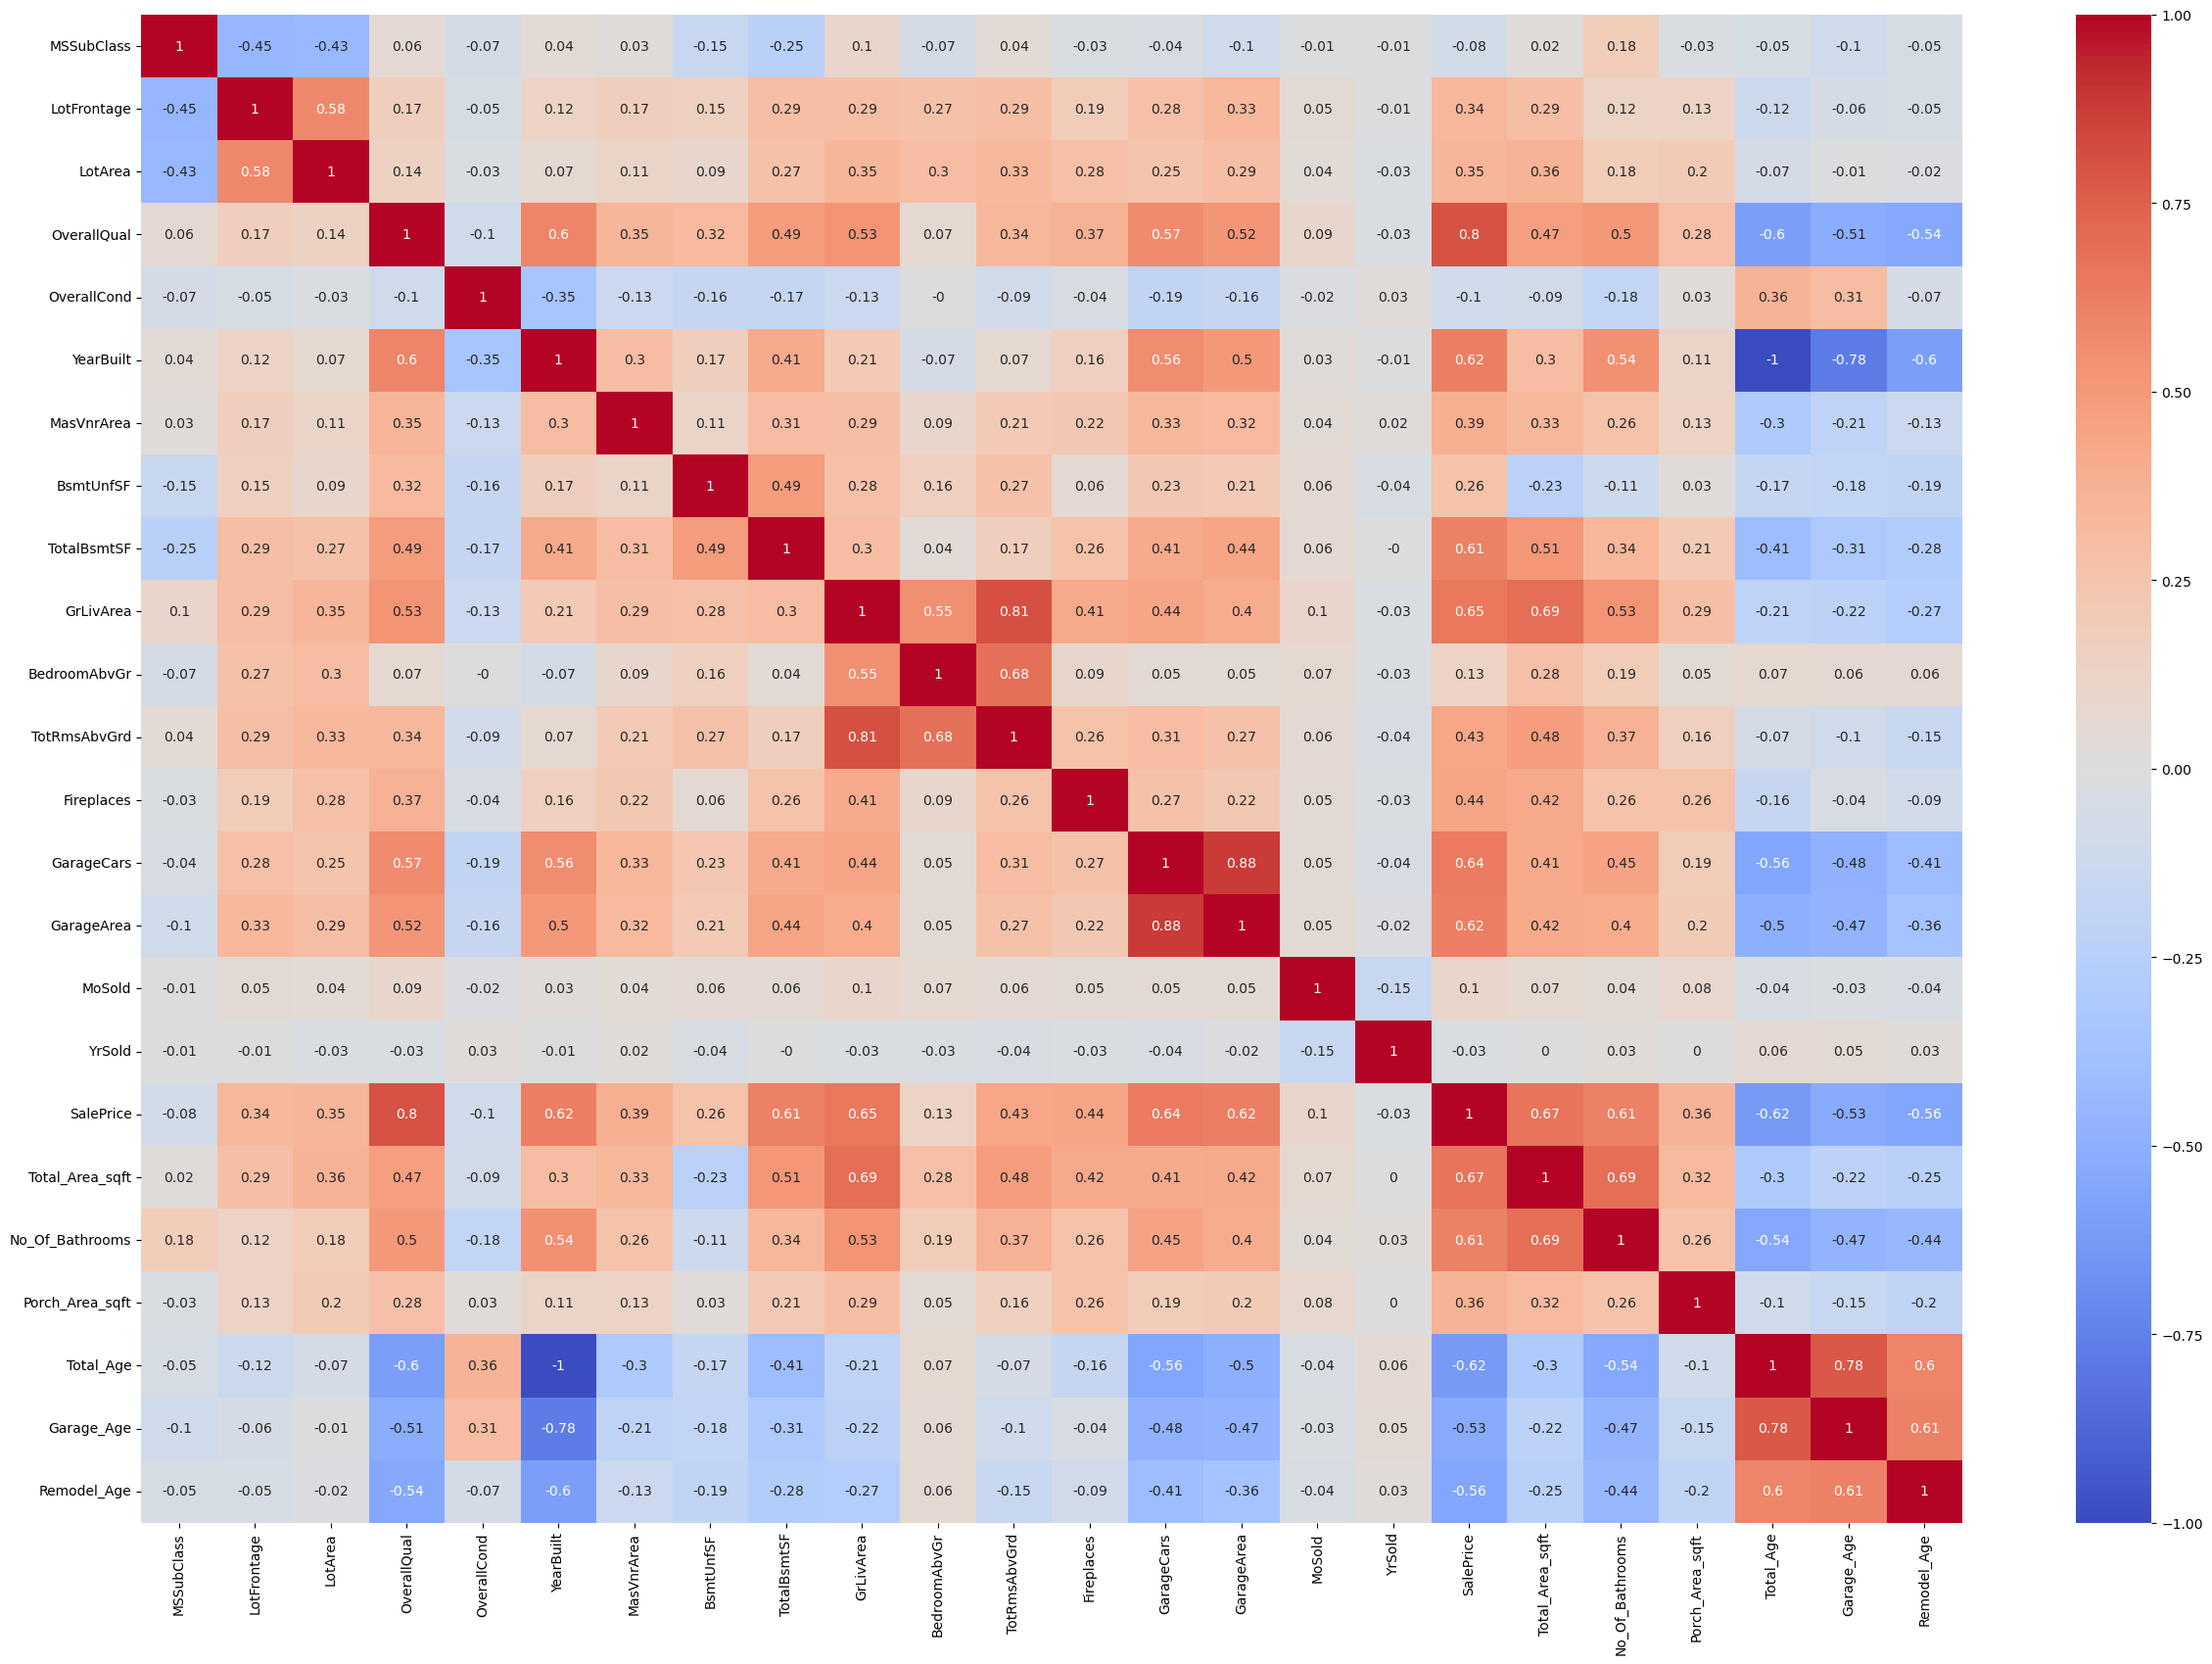

In [328]:
#Plotting heatmap for correlation between SalesPrice and Numerical Columns
plt.figure(figsize = (30,20))
sns.heatmap(round(houses[Numerical_Columns_List].corr(),2), cmap="coolwarm", annot=True)
plt.show()

In [195]:
#Find numerical columns with correlation > 0.5 or < -0.5
Key_Numerical_Columns = list(houses[Numerical_Columns_List].corr()["SalePrice"][(houses[Numerical_Columns_List].corr()["SalePrice"]>0.50) | (houses[Numerical_Columns_List].corr()["SalePrice"]<-0.50)].index)
Key_Numerical_Columns

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_Area_sqft',
 'No_Of_Bathrooms',
 'Total_Age',
 'Garage_Age',
 'Remodel_Age']

<Figure size 7000x9000 with 0 Axes>

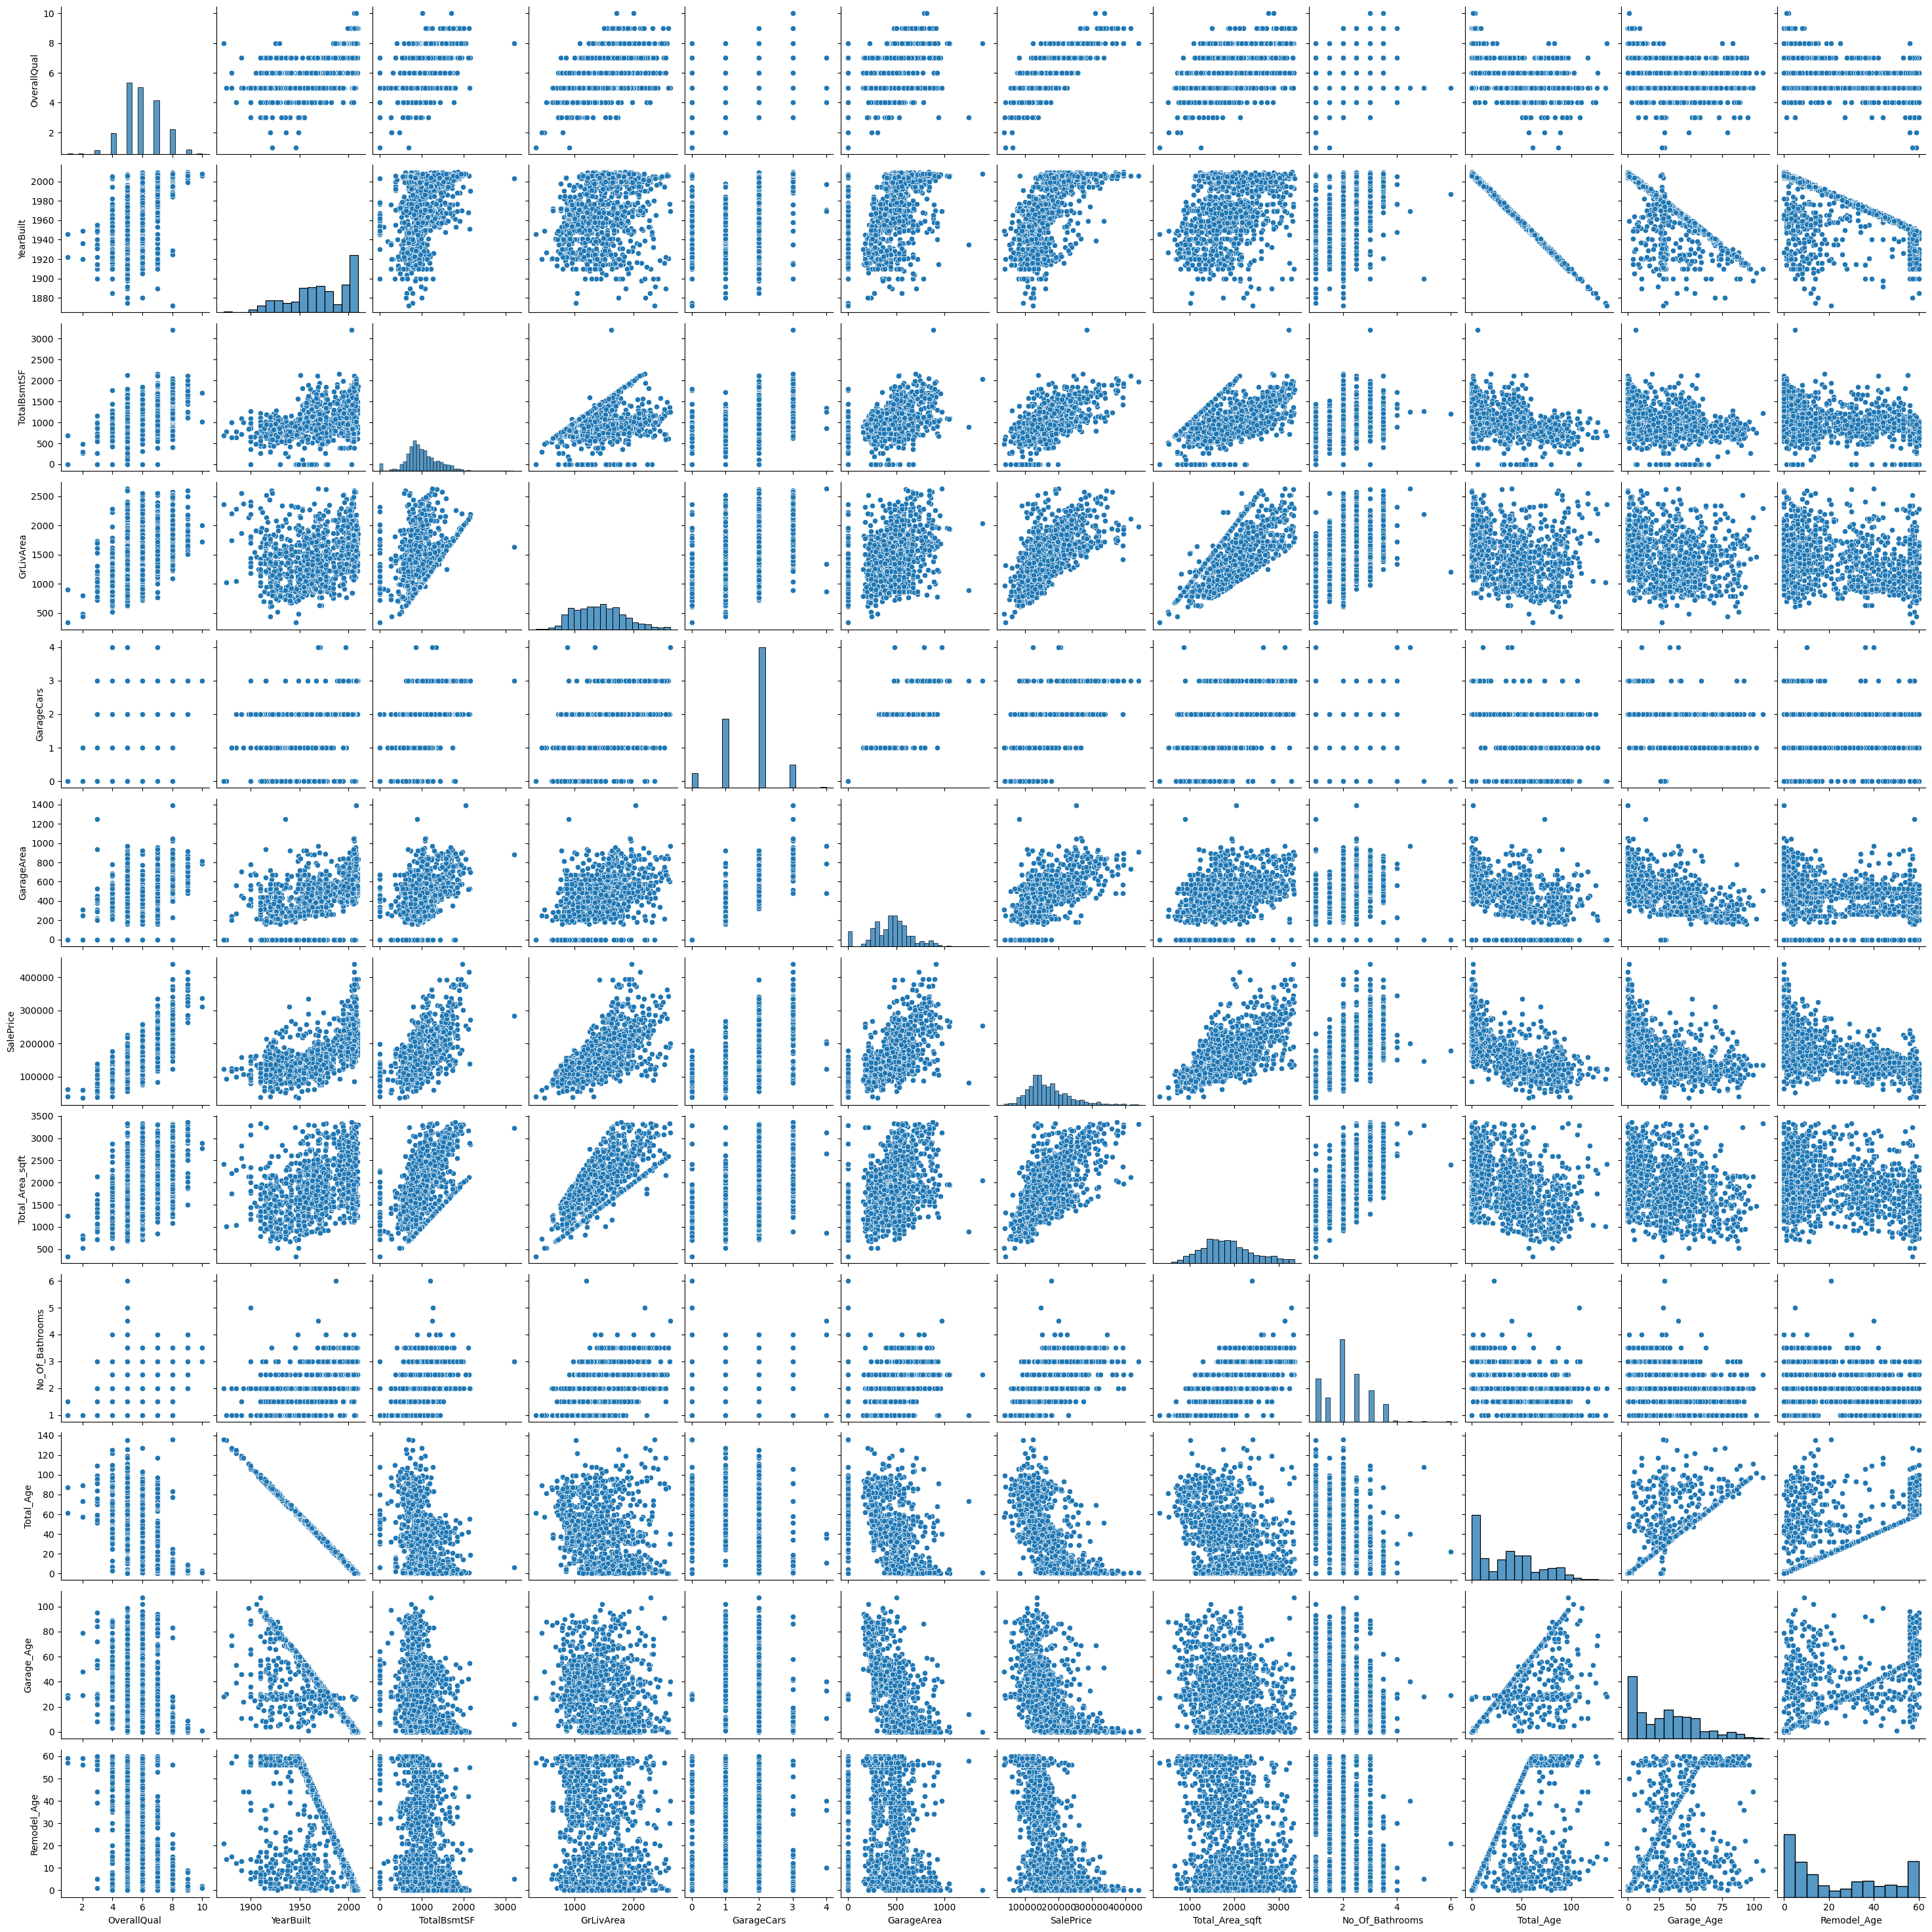

In [197]:
#Pairplot for Key Numerical Columns
plt.figure(figsize = (70, 90))
sns.pairplot(houses, vars= Key_Numerical_Columns)
plt.show()

## Data Preparation for Model

In [200]:
#Creating dummies for categorical columns
houses = pd.get_dummies(houses,drop_first=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1458
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(161), float64(4), int64(20)
memory usage: 454.8 KB


In [202]:
houses.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...           False   
1         0.0        284         1262       1262  ...           False   
2       162.0        434          920       1786  ...           False   
3         0.0        540          756       1717  ...           False   
4       350.0        490         1145       2198  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 185 columns]

In [204]:
houses.replace({False: 0, True: 1}, inplace=True)

In [206]:
houses.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...               0   
1         0.0        284         1262       1262  ...               0   
2       162.0        434          920       1786  ...               0   
3         0.0        540          756       1717  ...               0   
4       350.0        490         1145       2198  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 185 columns]

In [208]:
houses.shape

(1290, 185)

In [223]:
houses = houses.round(decimals = 2)

Split into Train and Test Set

In [225]:
df_train,df_test = train_test_split(houses, train_size = 0.7, random_state = 42)

In [227]:
df_train.shape

(902, 185)

In [229]:
df_test.shape

(388, 185)

In [231]:
#Scaling numerical column
Scaler = MinMaxScaler()
df_train[Numerical_Columns_List] = Scaler.fit_transform(df_train[Numerical_Columns_List])
df_train[Numerical_Columns_List].describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  902.000000   902.000000  902.000000   902.000000   902.000000   
mean     0.222284     0.463079    0.372511     0.552969     0.512195   
std      0.249353     0.171925    0.161631     0.141465     0.154726   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.393939    0.279319     0.444444     0.428571   
50%      0.176471     0.484848    0.368315     0.555556     0.428571   
75%      0.294118     0.545455    0.461361     0.666667     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea   BsmtUnfSF  TotalBsmtSF   GrLivArea  ...  \
count  902.000000  902.000000  902.000000   902.000000  902.000000  ...   
mean     0.721276    0.124413    0.270386     0.310770    0.474637  ...   
std      0.221585    0.206316    0.204902     0.118718    0.177817  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.583942    0.000000    0.111033     0.243528    0.332391  ...   
50%      0.729927    0.000000    0.235974     0.294604    0.465000  ...   
75%      0.941606    0.203125    0.384017     0.379757    0.591304  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       GarageArea      MoSold      YrSold   SalePrice  Total_Area_sqft  \
count  902.000000  902.000000  902.000000  902.000000       902.000000   
mean     0.328572    0.487805    0.451774    0.344057         0.498811   
std      0.144817    0.247816    0.330476    0.157395         0.190198   
min      0.000000    0.000000    0.000000    0.000000         0.000000   
25%      0.224460    0.363636    0.250000    0.236421         0.368430   
50%      0.335252    0.454545    0.500000    0.314829         0.475041   
75%      0.411511    0.636364    0.750000    0.422565         0.615537   
max      1.000000    1.000000    1.000000    1.000000         1.000000   

       No_Of_Bathrooms  Porch_Area_sqft   Total_Age  Garage_Age  Remodel_Age  
count       902.000000       902.000000  902.000000  902.000000   902.000000  
mean          0.226608         0.289447    0.272002    0.286661     0.392905  
std           0.147496         0.234267    0.223653    0.234139     0.348905  
min           0.000000         0.000000    0.000000    0.000000     0.000000  
25%           0.100000         0.070312    0.051471    0.068627     0.066667  
50%           0.200000         0.273897    0.257353    0.274510     0.250000  
75%           0.300000         0.446691    0.411765    0.460784     0.716667  
max           1.000000         1.000000    1.000000    1.000000     1.000000  

[8 rows x 24 columns]

In [233]:
#Creating X_train and y_train dataset
y_train = df_train.pop('SalePrice')#Target Variable
X_train = df_train
X_train.shape

(902, 184)

## Model Building with Feature Selection using RFE (Automated method)

In [236]:
#Fit the Model
lr = LinearRegression()
#Selecting first 30 Columns from total of 184 columns in X_train
rfe = RFE(lr, n_features_to_select = 30)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 105),
 ('LotFrontage', False, 94),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 52),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 123),
 ('GrLivArea', False, 32),
 ('BedroomAbvGr', False, 12),
 ('TotRmsAbvGrd', False, 61),
 ('Fireplaces', False, 57),
 ('GarageCars', True, 1),
 ('GarageArea', False, 143),
 ('MoSold', False, 154),
 ('YrSold', True, 1),
 ('Total_Area_sqft', True, 1),
 ('No_Of_Bathrooms', False, 10),
 ('Porch_Area_sqft', False, 41),
 ('Total_Age', True, 1),
 ('Garage_Age', False, 72),
 ('Remodel_Age', False, 58),
 ('MSZoning_FV', False, 13),
 ('MSZoning_RH', False, 14),
 ('MSZoning_RL', False, 15),
 ('MSZoning_RM', False, 16),
 ('LotShape_IR2', False, 130),
 ('LotShape_IR3', False, 128),
 ('LotShape_Reg', False, 132),
 ('LandContour_HLS', False, 43),
 ('LandContour_Low', False, 126),
 ('LandContour_Lvl', False, 125),
 ('LotConfig_CulDSac', False, 93),
 ('LotConfig_FR2

In [238]:
#Columns selected by RFE
Columns_Selected_By_RFE = X_train.columns[rfe.support_]
Columns_Selected_By_RFE

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtUnfSF',
       'GarageCars', 'YrSold', 'Total_Area_sqft', 'Total_Age',
       'Neighborhood_Blueste', 'Condition1_RRNe', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'ExterCond_Po', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_none', 'GarageFinish_none',
       'GarageQual_none', 'SaleType_CWD'],
      dtype='object')

In [240]:
X_train_rfe = X_train[Columns_Selected_By_RFE]
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.shape

(902, 31)

In [243]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     293.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:32:03   Log-Likelihood:                 1306.1
No. Observations:                 902   AIC:                            -2570.
Df Residuals:                     881   BIC:                            -2469.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1396      0.023     -6.009      0.000      -0.185      -0.094
LotArea                  0.1112      0.014      8.191      0.000       0.085       0.138
OverallQual              0.3310      0.022     14.757      0.000       0.287       0.375
OverallCond              0.1371      0.014      9.517      0.000       0.109       0.165
YearBuilt                0.0088      0.013      0.680      0.497      -0.017       0.034
BsmtUnfSF                0.1497      0.013     11.773      0.000       0.125       0.175
GarageCars               0.0882      0.018      4.990      0.000       0.054       0.123
YrSold                  -0.0048      0.006     -0.826      0.409      -0.016       0.007
Total_Area_sqft          0.3342      0.015     22.329      0.000       0.305       0.364
Total_Age               -0.1465      0.013    -11.042      0.000      -0.173      -0.120
Neighborhood_Blueste  -2.24e-17   2.35e-17     -0.952      0.341   -6.86e-17    2.38e-17
Condition1_RRNe      -6.833e-17   2.94e-17     -2.322      0.020   -1.26e-16   -1.06e-17
RoofStyle_Gable          0.0864      0.026      3.267      0.001       0.035       0.138
RoofStyle_Gambrel        0.1130      0.032      3.499      0.000       0.050       0.176
RoofStyle_Hip            0.0854      0.027      3.193      0.001       0.033       0.138
RoofStyle_Mansard        0.0894      0.042      2.112      0.035       0.006       0.172
Exterior1st_BrkComm     -0.1367      0.058     -2.353      0.019      -0.251      -0.023
Exterior1st_CBlock       0.0149      0.029      0.515      0.606      -0.042       0.072
Exterior2nd_CBlock       0.0149      0.029      0.515      0.606      -0.042       0.072
Exterior2nd_Other     4.784e-18   3.32e-18      1.441      0.150   -1.73e-18    1.13e-17
ExterCond_Po          8.945e-19   1.21e-18      0.737      0.461   -1.49e-18    3.28e-18
BsmtQual_none            0.0143      0.004      3.541      0.000       0.006       0.022
BsmtCond_none            0.0143      0.004      3.541      0.000       0.006       0.022
BsmtFinType1_none        0.0143      0.004      3.541      0.000       0.006       0.022
KitchenQual_Fa          -0.1085      0.017     -6.269      0.000      -0.142      -0.075
KitchenQual_Gd          -0.0998      0.010     -9.746      0.000      -0.120      -0.080
KitchenQual_TA          -0.1254      0.011    -11.236      0.000      -0.147      -0.104
GarageType_none          0.0071      0.004      1.985      0.047    7.89e-05       0.014
GarageFinish_none        0.0071      0.004      1.985      0.047    7.89e-05       0.014
GarageQual_none          0.0071      0.004      1.985      0.047    7.89e-05       0.014
SaleType_CWD             0.1531      0.041      3.723      0.000       0.072       0.234
=========================================================

In [245]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
27       GarageType_none    inf
28     GarageFinish_none    inf
23     BsmtFinType1_none    inf
22         BsmtCond_none    inf
4              YearBuilt    inf
21         BsmtQual_none    inf
18    Exterior2nd_CBlock    inf
7                 YrSold    inf
17    Exterior1st_CBlock    inf
9              Total_Age    inf
29       GarageQual_none    inf
12       RoofStyle_Gable  28.48
14         RoofStyle_Hip  26.55
26        KitchenQual_TA   8.44
25        KitchenQual_Gd   6.83
13     RoofStyle_Gambrel   3.12
6             GarageCars   2.79
2            OverallQual   2.74
8        Total_Area_sqft   2.20
24        KitchenQual_Fa   1.94
5              BsmtUnfSF   1.85
15     RoofStyle_Mansard   1.62
3            OverallCond   1.35
1                LotArea   1.31
30          SaleType_CWD   1.02
16   Exterior1st_BrkComm   1.02
0                  const   0.00
10  Neighborhood_Blueste    NaN
11       Condition1_RRNe    NaN
19     Exterior2nd_Other    NaN
20          ExterCond_Po    NaN

## Model Prediction

In [248]:
Scaler = MinMaxScaler()
df_test[Numerical_Columns_List] = Scaler.fit_transform(df_test[Numerical_Columns_List])
y_test = df_test.pop('SalePrice')
X_test = df_test

## Ridge - Regularization

In [253]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [255]:
ridge_results = pd.DataFrame(ridge_model.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha'] <= 500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.028943        -0.035836                1
14         3.0         -0.029512        -0.035934                2
12         1.0         -0.028329        -0.035960                3
11         0.9         -0.028263        -0.036004                4
10         0.8         -0.028194        -0.036058                5
15         4.0         -0.030026        -0.036115                6
9          0.7         -0.028121        -0.036127                7
8          0.6         -0.028045        -0.036212                8
7          0.5         -0.027965        -0.036315                9
16         5.0         -0.030506        -0.036344               10
6          0.4         -0.027887        -0.036433               11
5          0.3         -0.027807        -0.036580               12
17         6.0         -0.030957        -0.036599               13
4          0.2         -0.027723        -0.036768               14
18         7.0         -0.031385        -0.036863               15
3          0.1         -0.027637        -0.037063               16
19         8.0         -0.031796        -0.037125               17
20         9.0         -0.032189        -0.037381               18
2         0.01         -0.027552        -0.037540               19
1        0.001         -0.027541        -0.037616               20
0       0.0001         -0.027540        -0.037626               21
21        10.0         -0.032571        -0.037638               22
22          20         -0.035820        -0.040084               23
23          50         -0.042303        -0.045645               24
24         100         -0.048783        -0.051555               25
25         500         -0.067807        -0.069204               26

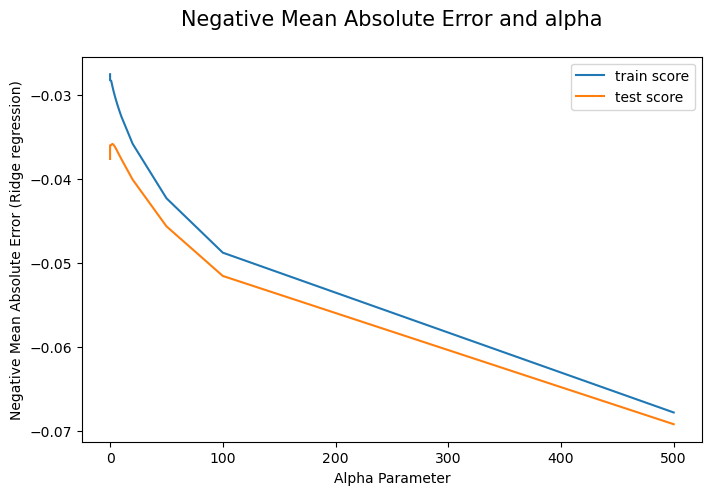

In [257]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(8,5))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('Alpha Parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [261]:
ridge_model.best_params_

{'alpha': 2.0}

In [263]:
# Hyperparameter lambda = 2.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.27046015e-02,  1.99878646e-02,  5.73767671e-02,  1.30621197e-01,
        9.15226740e-02,  5.30038962e-02,  2.48950354e-02,  4.38798084e-02,
        6.65329780e-02,  1.06657448e-01,  1.28287685e-03,  2.82653260e-02,
        4.26434704e-02,  4.50857406e-02,  2.38215135e-02,  8.15095998e-04,
        2.01366053e-03,  1.26262866e-01,  4.93543985e-02,  3.37660271e-02,
       -5.33344054e-02, -3.89156286e-04, -2.95075470e-02,  4.42243671e-02,
        2.44701509e-02,  2.40459514e-02,  9.98094754e-03,  5.49360880e-03,
        2.63320504e-03,  1.74991088e-03,  2.17985337e-02, -6.71660628e-03,
       -4.45936597e-03,  1.53000661e-02, -1.00438246e-02, -1.04553477e-03,
       -2.14098576e-03,  0.00000000e+00,  1.90025467e-02,  1.81573447e-02,
       -1.79510038e-02, -1.75860384e-02,  4.55013346e-02, -2.73420108e-02,
       -3.11887842e-02, -1.38557748e-02, -1.05003092e-02, -3.16419461e-02,
       -1.87707978e-02,  2.40814429e-02, -2.90715976e-02,  2.93640718e-02,
        5.61689992e-02, -

In [265]:
mse = mean_squared_error(y_test, ridge.predict(X_test))
mse

0.004524210586715149

In [267]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.9264055686661165

In [269]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.8175983890794993

In [271]:
# Lets observe the porameters by changing +1 and -1 of the alpha value
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.0048020748062760615
The r2 value of train data is  0.9264055686661165
The r2 value of test data is  0.8175983890794993

The output when alpha is 2: 
The mean squared error value is  0.004524210586715149
The r2 value of train data is  0.9264055686661165
The r2 value of test data is  0.8175983890794993

The output when alpha is 3: 
The mean squared error value is  0.004352641817313701
The r2 value of train data is  0.9264055686661165
The r2 value of test data is  0.8175983890794993


In [273]:
#MSE decreses as value of alpha increases as 1, 2 and 3
#Taking the best alpha value as 2

In [275]:
# house_pricing_ridge: Features and coefficienst of Ridge
house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0340
1              LotFrontage       0.0225
2                  LotArea       0.0541
3              OverallQual       0.1224
4              OverallCond       0.0841
5                YearBuilt       0.0485
6               MasVnrArea       0.0263
7                BsmtUnfSF       0.0418
8              TotalBsmtSF       0.0640
9                GrLivArea       0.1030
10            BedroomAbvGr       0.0041
11            TotRmsAbvGrd       0.0306
12              Fireplaces       0.0446
13              GarageCars       0.0431
14              GarageArea       0.0272
15                  MoSold       0.0011
16                  YrSold       0.0022
17         Total_Area_sqft       0.1210
18         No_Of_Bathrooms       0.0479
19         Porch_Area_sqft       0.0339
20               Total_Age      -0.0488
21              Garage_Age      -0.0003
22             Remodel_Age      -0.0318
23             MSZoning_FV       0.0365
24             MSZoning_RH       0.0175
25             MSZoning_RL       0.0196
26             MSZoning_RM       0.0045
27            LotShape_IR2       0.0051
28            LotShape_IR3       0.0015
29            LotShape_Reg       0.0010
30         LandContour_HLS       0.0218
31         LandContour_Low      -0.0059
32         LandContour_Lvl      -0.0039
33       LotConfig_CulDSac       0.0158
34           LotConfig_FR2      -0.0092
35           LotConfig_FR3      -0.0011
36        LotConfig_Inside      -0.0017
37    Neighborhood_Blueste       0.0000
38     Neighborhood_BrDale       0.0171
39    Neighborhood_BrkSide       0.0183
40    Neighborhood_ClearCr      -0.0155
41    Neighborhood_CollgCr      -0.0169
42    Neighborhood_Crawfor       0.0459
43    Neighborhood_Edwards      -0.0263
44    Neighborhood_Gilbert      -0.0302
45     Neighborhood_IDOTRR      -0.0144
46    Neighborhood_MeadowV      -0.0126
47    Neighborhood_Mitchel      -0.0297
48      Neighborhood_NAmes      -0.0178
49    Neighborhood_NPkVill       0.0206
50     Neighborhood_NWAmes      -0.0261
51    Neighborhood_NoRidge       0.0283
52    Neighborhood_NridgHt       0.0556
53    Neighborhood_OldTown      -0.0170
54      Neighborhood_SWISU      -0.0093
55     Neighborhood_Sawyer      -0.0162
56    Neighborhood_SawyerW      -0.0078
57    Neighborhood_Somerst       0.0102
58    Neighborhood_StoneBr       0.0713
59     Neighborhood_Timber      -0.0211
60    Neighborhood_Veenker      -0.0051
61        Condition1_Feedr       0.0047
62         Condition1_Norm       0.0193
63         Condition1_PosA       0.0232
64         Condition1_PosN       0.0287
65         Condition1_RRAe      -0.0209
66         Condition1_RRAn      -0.0015
67         Condition1_RRNe       0.0000
68         Condition1_RRNn       0.0196
69         BldgType_2fmCon      -0.0071
70         BldgType_Duplex      -0.0251
71          BldgType_Twnhs      -0.0341
72         BldgType_TwnhsE      -0.0252
73       HouseStyle_1.5Unf      -0.0047
74       HouseStyle_1Story      -0.0082
75       HouseStyle_2.5Fin      -0.0269
76       HouseStyle_2.5Unf       0.0015
77       HouseStyle_2Story       0.0012
78       HouseStyle_SFoyer      -0.0200
79         HouseStyle_SLvl      -0.0051
80         RoofStyle_Gable       0.0107
81       RoofStyle_Gambrel       0.0165
82           RoofStyle_Hip       0.0149
83       RoofStyle_Mansard       0.0153
84          RoofStyle_Shed      -0.0104
85     Exterior1st_AsphShn      -0.0043
86     Exterior1st_BrkComm      -0.0218
87     Exterior1st_BrkFace       0.0348
88      Exterior1st_CBlock      -0.0053
89     Exterior1st_CemntBd      -0.0165
90     Exterior1st_HdBoard      -0.0023
91     Exterior1st_ImStucc       0.0013
92     Exterior1st_MetalSd       0.0005
93     Exterior1st_Plywood      -0.0013
94       Exterior1st_Stone      -0.0077
95      Exterior1st_Stucco       0.0286
96     Exterior1st_VinylSd      -0.0098
97     Exterior1st_Wd Sdng      -0.0146
98     Exterior1st_WdShing      -0.0063
99     Exterior2nd

## Lasso - Regularization

In [278]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [280]:
# display the mean scores

lasso_results = pd.DataFrame(lasso_model.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.029346        -0.035367                1
1       0.0002         -0.030391        -0.035671                2
2       0.0003         -0.031313        -0.036136                3
3       0.0004         -0.032118        -0.036639                4
4       0.0005         -0.032944        -0.037146                5
5        0.001         -0.036735        -0.039809                6
6        0.002         -0.041937        -0.044191                7
7        0.003         -0.046053        -0.047749                8
8        0.004         -0.050308        -0.051618                9
9        0.005         -0.054149        -0.055314               10
10        0.01         -0.070816        -0.071842               11

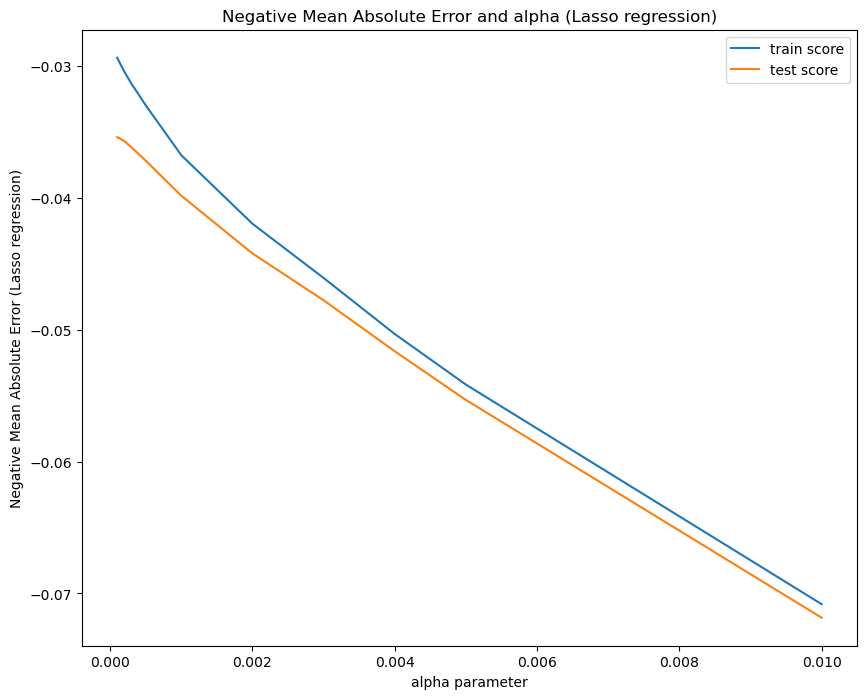

In [282]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [284]:
# lambda best estimator
lasso_model.best_estimator_

Lasso(alpha=0.0001)

In [286]:
# # Hyperparameter lambda = .0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-3.98653053e-02,  1.40883796e-02,  5.52086527e-02,  1.73628939e-01,
        1.09580164e-01,  1.21344745e-01,  2.25299527e-02,  9.07998952e-02,
        0.00000000e+00,  7.91526967e-02, -0.00000000e+00,  1.23133294e-02,
        3.53885321e-02,  5.98906646e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.04999791e-01,  4.52351323e-02,  3.24718285e-02,
       -0.00000000e+00, -0.00000000e+00, -2.55168310e-02,  3.89170486e-02,
        1.21900586e-02,  1.48443166e-02, -0.00000000e+00,  1.10554849e-04,
        0.00000000e+00,  5.67218076e-04,  1.98784903e-02, -0.00000000e+00,
       -1.32027956e-03,  1.18922226e-02, -3.53948518e-03, -0.00000000e+00,
       -7.31987316e-04,  0.00000000e+00,  1.80687125e-02,  2.90718960e-02,
       -0.00000000e+00, -4.86691135e-03,  5.33988631e-02, -1.28035372e-02,
       -1.63125683e-02, -0.00000000e+00,  0.00000000e+00, -2.05601346e-02,
       -8.33923652e-03,  1.97325618e-02, -1.98461291e-02,  3.73089036e-02,
        6.52992761e-02, -

In [288]:
mse = mean_squared_error(y_test, lasso.predict(X_test))
mse

0.003859104983929793

In [290]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.9239704246262825

In [292]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.8444133065231152

In [294]:
#Features and coefficienst of Lasso
houses_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
houses_lasso = houses_lasso[houses_lasso['Coefficient'] != 0.00]
houses_lasso.reset_index(drop=True, inplace=True)
houses_lasso

Features  Coefficient
0               MSSubClass      -0.0399
1              LotFrontage       0.0141
2                  LotArea       0.0552
3              OverallQual       0.1736
4              OverallCond       0.1096
5                YearBuilt       0.1213
6               MasVnrArea       0.0225
7                BsmtUnfSF       0.0908
8                GrLivArea       0.0792
9             TotRmsAbvGrd       0.0123
10              Fireplaces       0.0354
11              GarageCars       0.0599
12         Total_Area_sqft       0.2050
13         No_Of_Bathrooms       0.0452
14         Porch_Area_sqft       0.0325
15             Remodel_Age      -0.0255
16             MSZoning_FV       0.0389
17             MSZoning_RH       0.0122
18             MSZoning_RL       0.0148
19            LotShape_IR2       0.0001
20            LotShape_Reg       0.0006
21         LandContour_HLS       0.0199
22         LandContour_Lvl      -0.0013
23       LotConfig_CulDSac       0.0119
24           LotConfig_FR2      -0.0035
25        LotConfig_Inside      -0.0007
26     Neighborhood_BrDale       0.0181
27    Neighborhood_BrkSide       0.0291
28    Neighborhood_CollgCr      -0.0049
29    Neighborhood_Crawfor       0.0534
30    Neighborhood_Edwards      -0.0128
31    Neighborhood_Gilbert      -0.0163
32    Neighborhood_Mitchel      -0.0206
33      Neighborhood_NAmes      -0.0083
34    Neighborhood_NPkVill       0.0197
35     Neighborhood_NWAmes      -0.0198
36    Neighborhood_NoRidge       0.0373
37    Neighborhood_NridgHt       0.0653
38    Neighborhood_OldTown      -0.0054
39     Neighborhood_Sawyer      -0.0059
40    Neighborhood_SawyerW       0.0002
41    Neighborhood_Somerst       0.0127
42    Neighborhood_StoneBr       0.0793
43     Neighborhood_Timber      -0.0080
44        Condition1_Feedr       0.0008
45         Condition1_Norm       0.0155
46         Condition1_PosA       0.0016
47         Condition1_PosN       0.0242
48         Condition1_RRAe      -0.0260
49         BldgType_Duplex      -0.0247
50          BldgType_Twnhs      -0.0311
51         BldgType_TwnhsE      -0.0197
52       HouseStyle_1Story      -0.0044
53       HouseStyle_2.5Fin      -0.0105
54       HouseStyle_SFoyer      -0.0066
55       RoofStyle_Gambrel       0.0035
56           RoofStyle_Hip       0.0015
57     Exterior1st_BrkFace       0.0343
58     Exterior1st_MetalSd       0.0035
59      Exterior1st_Stucco       0.0362
60     Exterior1st_VinylSd      -0.0019
61     Exterior1st_Wd Sdng      -0.0048
62     Exterior2nd_BrkFace      -0.0039
63     Exterior2nd_CmentBd       0.0097
64     Exterior2nd_HdBoard      -0.0062
65     Exterior2nd_Plywood      -0.0055
66     Exterior2nd_Wd Shng      -0.0173
67            ExterQual_Fa      -0.0041
68            ExterQual_TA      -0.0139
69            ExterCond_TA       0.0103
70       Foundation_CBlock      -0.0004
71        Foundation_PConc       0.0136
72             BsmtQual_Fa      -0.0020
73             BsmtQual_Gd      -0.0254
74             BsmtQual_TA      -0.0213
75             BsmtCond_Gd       0.0065
76             BsmtCond_TA       0.0082
77         BsmtExposure_Gd       0.0320
78         BsmtExposure_Mn      -0.0104
79         BsmtExposure_No      -0.0114
80        BsmtFinType1_BLQ      -0.0005
81        BsmtFinType1_GLQ       0.0116
82        BsmtFinType1_LwQ      -0.0099
83        BsmtFinType1_Rec       0.0014
84        BsmtFinType1_Unf      -0.0052
85        BsmtFinType2_BLQ      -0.0068
86        BsmtFinType2_Rec      -0.0111
87        BsmtFinType2_Unf       0.0054
88            HeatingQC_Fa      -0.0013
89            HeatingQC_Gd      -0.0059
90            HeatingQC_TA      -0.0057
91          KitchenQual_Fa      -0.0561
92          KitchenQual_Gd      -0.0654
93          KitchenQual_TA      -0.0634
94       GarageType_Attchd       0.0041
95      GarageType_Basment      -0.0014
96      GarageType_BuiltIn       0.0057
97      GarageType_CarPort      -0.0109
98       GarageType_Detchd       0.0028
99        GarageFi

# Result
1. Value of Alpha
- Ridge Regularization - 2.0
- Lasso Regularization - 0.0001
2. R2 Values
- Ridge - Train = 0.926 , Test = 0.817
- Lasso - Train = 0.923 , Test = 0.844
3. Mean Squared error
- Ridge - 0.00452
- Lasso - 0.00385

# Subjective Questions

### Question 1 :
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Value of Alpha
- Ridge Regularization - 2.0
- Lasso Regularization - 0.0001

In [303]:
## Making Alpha for Ridge as 4.0
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("MSE = ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2 Train = ", r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R2 Test = ", r2_test)

MSE =  0.004233975707913831
R2 Train =  0.9239704246262825
R2 Test =  0.8444133065231152


In [306]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 4 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 4 are :

                      Coefficient
Total_Area_sqft          0.116719
OverallQual              0.115584
GrLivArea                0.099927
OverallCond              0.077934
Neighborhood_StoneBr     0.067957
TotalBsmtSF              0.061788
Neighborhood_NridgHt     0.054962
LotArea                  0.051809
SaleType_CWD             0.047507
No_Of_Bathrooms          0.046374


In [308]:
#Let's create a Lasso model with alpha  = 0.0002
alpha = 0.0002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("MSE = ",mse)
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2 Train = ", r2_train)
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R2 Test = ", r2_test)

MSE =  0.003793075484624658
R2 Train =  0.9193554915915918
R2 Test =  0.8470754034371926


In [310]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0002 are:

                      Coefficient
Total_Area_sqft          0.206281
OverallQual              0.188863
YearBuilt                0.104020
OverallCond              0.102881
GrLivArea                0.088841
BsmtUnfSF                0.082701
Neighborhood_StoneBr     0.070035
Neighborhood_NridgHt     0.064862
GarageCars               0.061623
Neighborhood_Crawfor     0.055672


### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [313]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['Total_Area_sqft','OverallQual','YearBuilt','OverallCond','GrLivArea']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(902, 179)
(388, 179)


In [315]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

                      Coefficient
TotalBsmtSF              0.272874
SaleType_CWD             0.139783
Neighborhood_StoneBr     0.116550
TotRmsAbvGrd             0.115813
No_Of_Bathrooms          0.087548
